In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bundle = joblib.load("../models/predictive_maintenance_model.pkl")
model = bundle["model"]
columns = bundle["columns"]

data = joblib.load("../data/train_test.pkl")
X_test = data["X_test"]

# rename columns same as training
def clean_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.replace('[', '', regex=False)
        .str.replace(']', '', regex=False)
        .str.replace(' ', '_')
        .str.replace('/', '')
    )
    return df

X_test = clean_columns(X_test)

In [2]:
importance = model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feat_imp

,Feature,Importance
2,Rotational_speed_rpm,0.327146
3,Torque_Nm,0.219434
4,Tool_wear_min,0.203746
5,temp_diff,0.096938
6,Type_L,0.047847
7,Type_M,0.042419
1,Process_temperature_K,0.032171
0,Air_temperature_K,0.030299


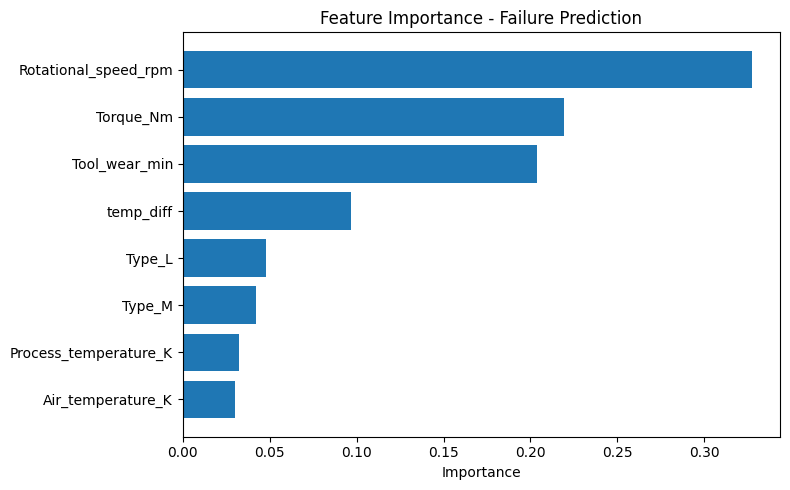

In [3]:
plt.figure(figsize=(8,5))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Failure Prediction")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()